<a href="https://colab.research.google.com/github/ajayatluri79/deeplearning/blob/master/Assignment3_0_9944.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

***Training and Test Data ***

Divide the mnsist data into training and test

***mnist DATA set***

Loading the Mnist Data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

***Multiple Images***

Printing the Multiple Images to look athe size of the images manually

***1st Image***

Printing the 1st  Image

(60000, 28, 28)


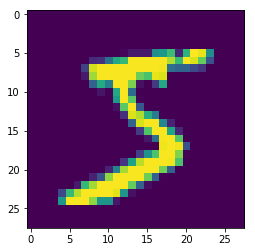

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

***5th Image***

Printing the 5th Image

(60000, 28, 28)


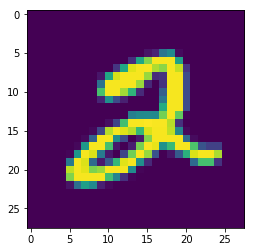

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

***120th Image***

Printing the 120th Image

(60000, 28, 28)


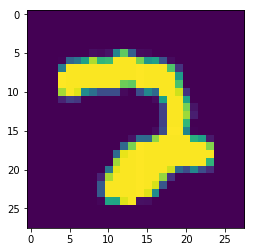

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[120])

In [8]:
print(X_train.shape[0])

60000


In [9]:
print(X_test.shape[0])

10000


Training and Testig  data 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

LOOKING AT THE FIRST 5 Training values

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

***Model Structure***

`Modifying the Model Structure

Intiatally tried with the 16,32,64 but parameters becoming more and also used the drop out at 0.15 but, validation values is less.

Tried with 16,32,32 and increased the drop out to 20% at the first layer. 

Then flatten the network at 16 only with the dropout rate as 0.40


In [16]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))
          

model.add(Convolution2D(32,3,3, activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Convolution2D(32,3,3, activation='relu'))
model.add(Convolution2D(10,3,3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Ke

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        528       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        528       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

***Model Fit***

Tried changing the batch sizes as 256 and epochs as 10, 15, 20 and split as 0.15, 0.20 and 0.3

Increased the batch size as 512 and epoch at 5,10, 15, 20 and 30 and validation split at 0.2 ,0.3 and 0.4


In [25]:
model.fit(X_train, Y_train, batch_size=512,nb_epoch=50, verbose=1,validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/50
 2560/51000 [>.............................] - ETA: 2s - loss: 0.0461 - acc: 0.9836

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


51000/51000 [==============================] - 2s 41us/step - loss: 0.0539 - acc: 0.9826 - val_loss: 0.0289 - val_acc: 0.9918
Epoch 2/50
51000/51000 [==============================] - 2s 35us/step - loss: 0.0504 - acc: 0.9843 - val_loss: 0.0286 - val_acc: 0.9916
Epoch 3/50
51000/51000 [==============================] - 2s 35us/step - loss: 0.0521 - acc: 0.9835 - val_loss: 0.0293 - val_acc: 0.9916
Epoch 4/50
51000/51000 [==============================] - 2s 35us/step - loss: 0.0508 - acc: 0.9836 - val_loss: 0.0291 - val_acc: 0.9912
Epoch 5/50
51000/51000 [==============================] - 2s 35us/step - loss: 0.0483 - acc: 0.9847 - val_loss: 0.0293 - val_acc: 0.9913
Epoch 6/50
51000/51000 [==============================] - 2s 35us/step - loss: 0.0456 - acc: 0.9855 - val_loss: 0.0300 - val_acc: 0.9909
Epoch 7/50
51000/51000 [==============================] - 2s 35us/step - loss: 0.0447 - acc: 0.9857 - val_loss: 0.0284 - val_acc: 0.9914
Epoch 8/50
51000/51000 [============================

In [26]:
model.fit(X_train, Y_train, batch_size=512,nb_epoch=10, verbose=1,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 3072/54000 [>.............................] - ETA: 2s - loss: 0.0246 - acc: 0.9899

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


54000/54000 [==============================] - 2s 31us/step - loss: 0.0250 - acc: 0.9913 - val_loss: 0.0228 - val_acc: 0.9943
Epoch 2/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.0245 - acc: 0.9914 - val_loss: 0.0219 - val_acc: 0.9945
Epoch 3/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0210 - val_acc: 0.9948
Epoch 4/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0238 - val_acc: 0.9935
Epoch 5/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.0259 - acc: 0.9917 - val_loss: 0.0226 - val_acc: 0.9947
Epoch 6/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.0236 - acc: 0.9921 - val_loss: 0.0224 - val_acc: 0.9935
Epoch 7/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.0246 - acc: 0.9924 - val_loss: 0.0209 - val_acc: 0.9945
Epoch 8/10
54000/54000 [============================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [28]:
print(score)

[0.01873271487966558, 0.9944]


In [0]:
y_pred = model.predict(X_test)

In [30]:
print(y_pred[:9])
print(y_test[:9])

[[1.0256275e-10 7.6637308e-10 2.0746423e-08 1.5454020e-07 4.2970328e-12
  1.5197743e-10 2.4095660e-16 9.9999928e-01 2.0131483e-09 6.2365712e-07]
 [9.1533120e-10 1.7240950e-08 1.0000000e+00 1.2311325e-09 3.3037083e-11
  1.9668527e-13 1.4172040e-08 5.2226318e-12 5.7010852e-10 3.2994226e-13]
 [5.8290226e-09 9.9998701e-01 7.8088922e-09 6.6231470e-10 9.6282911e-06
  1.9354613e-07 7.5341285e-07 6.9902597e-07 1.5682792e-06 1.4457940e-07]
 [9.9984431e-01 3.1409350e-15 3.7002315e-09 6.9748460e-09 6.2584365e-10
  4.9270497e-08 1.4148204e-04 5.8062388e-11 1.1842457e-06 1.3051805e-05]
 [3.1101051e-12 2.3210201e-11 7.5074541e-10 4.4234438e-13 9.9999428e-01
  4.3488466e-13 3.0670941e-09 2.1284582e-11 1.9432822e-09 5.7225639e-06]
 [4.6159807e-10 9.9998844e-01 6.3566628e-09 7.3505793e-12 9.0386256e-06
  3.0800482e-10 8.4540289e-08 2.1642593e-06 1.8102949e-07 1.0376873e-08]
 [2.6057179e-15 1.7521623e-10 5.7263811e-09 2.0216146e-13 9.9999034e-01
  1.0290387e-08 6.6352814e-14 2.7626876e-07 3.4505204e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [32]:
print(layer_dict)

{'conv2d_8': <keras.layers.convolutional.Conv2D object at 0x7f71ba53c518>, 'conv2d_9': <keras.layers.convolutional.Conv2D object at 0x7f71ba53cf60>, 'conv2d_10': <keras.layers.convolutional.Conv2D object at 0x7f71ba555390>, 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D object at 0x7f71ba5161d0>, 'dropout_3': <keras.layers.core.Dropout object at 0x7f71ba5554a8>, 'conv2d_11': <keras.layers.convolutional.Conv2D object at 0x7f71ba503b00>, 'conv2d_12': <keras.layers.convolutional.Conv2D object at 0x7f71ba555550>, 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D object at 0x7f71ba480860>, 'dropout_4': <keras.layers.core.Dropout object at 0x7f71ba4b15c0>, 'conv2d_13': <keras.layers.convolutional.Conv2D object at 0x7f71ba480780>, 'conv2d_14': <keras.layers.convolutional.Conv2D object at 0x7f71ba4c7048>, 'flatten_2': <keras.layers.core.Flatten object at 0x7f71ba4abc18>, 'activation_2': <keras.layers.core.Activation object at 0x7f71ba4aba90>}


In [33]:
print(np.shape(X_train[2]))

(28, 28, 1)


In [34]:
layer_name='conv2d_8'
layer_output = layer_dict[layer_name].output
print(layer_output.shape[3])

16


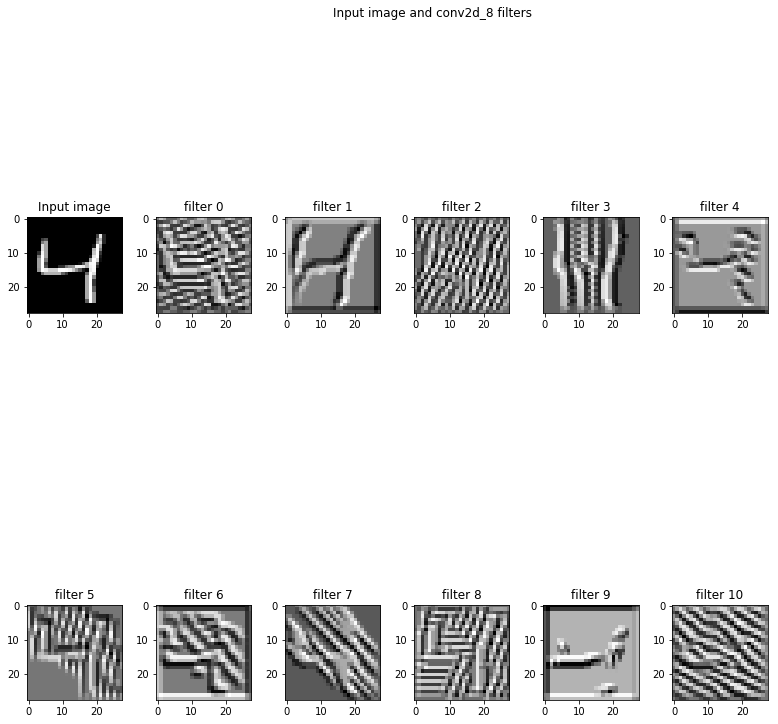

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_8'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()